In [2]:
%matplotlib nbagg
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os

In [3]:
DIR = "/sf/alvra/data/p17569/res/scan_data/knife_edge_X_rough_005/"
#DIR = "/sf/alvra/data/p17589/raw/"

!ls -lah -t /sf/alvra/data/p17569/res/scan_data/knife_edge_X_rough_005/
#!ls -lah -t /sf/alvra/data/p17589/raw/

!hostname

listfile = os.listdir(DIR)
number_files = len(listfile)
print ("There are",number_files,"files in the folder", DIR)

total 41M
drwxrwsr-x. 27 39147 p17569  32K Dec  7 15:29 ..
drwxr-sr-x.  2 root  p17569 4.0K Dec  7 15:24 .
-rw-r--r--.  1 root  p17569 3.7M Dec  7 15:24 knife_edge_X_rough_005_step0010.h5
-rw-r--r--.  1 root  p17569 3.7M Dec  7 15:24 knife_edge_X_rough_005_step0009.h5
-rw-r--r--.  1 root  p17569 3.7M Dec  7 15:24 knife_edge_X_rough_005_step0008.h5
-rw-r--r--.  1 root  p17569 3.7M Dec  7 15:24 knife_edge_X_rough_005_step0007.h5
-rw-r--r--.  1 root  p17569 3.7M Dec  7 15:23 knife_edge_X_rough_005_step0006.h5
-rw-r--r--.  1 root  p17569 3.7M Dec  7 15:23 knife_edge_X_rough_005_step0005.h5
-rw-r--r--.  1 root  p17569 3.7M Dec  7 15:23 knife_edge_X_rough_005_step0004.h5
-rw-r--r--.  1 root  p17569 3.7M Dec  7 15:23 knife_edge_X_rough_005_step0003.h5
-rw-r--r--.  1 root  p17569 3.7M Dec  7 15:23 knife_edge_X_rough_005_step0002.h5
-rw-r--r--.  1 root  p17569 3.7M Dec  7 15:23 knife_edge_X_rough_005_step0001.h5
-rw-r--r--.  1 root  p17569 3.7M Dec  7 15:23 knife_edge_X_rough_005_step0000.h5
ra

In [4]:
fileName = "knife_edge_X_rough_005_step0000.h5"

BS_file = h5py.File(DIR + fileName)
#print(list(BS_file["data"].keys()))

PIPS_trans = BS_file["SARES11-GES1:CH1_VAL_GET/data"]
Izero = BS_file["SARES11-LSCP10-FNS:CH3:VAL_GET/data"] 
#LaserDiode = BS_file["SLAAR11-LSCP1-FNS:CH1:VAL_GET/data"] 
#LaserDiode = BS_file["SARES11-GES1:CH2_VAL_GET/data"] 
pulse_ids = BS_file["SARES11-GES1:CH1_VAL_GET/pulse_id"]

<IPython.core.display.Javascript object>


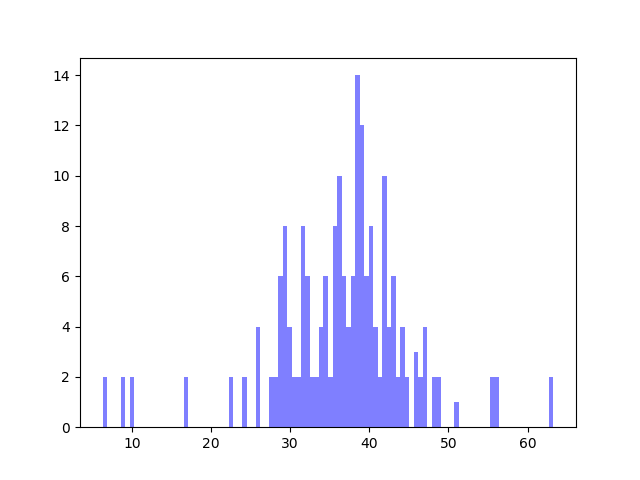

In [5]:
num_bins = 100
plt.figure()
plt.hist(Izero[:], num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [11]:
print(pulse_ids.size)

200


In [16]:
### this is now to loop over SEVERAL FILES

fileName_root = 'knife_edge_X_rough_005'
Int_threshold = 5

listfile = os.listdir(DIR)
number_files = int(len(listfile))

print ("Start processing",number_files,"files")


Position = []
signal = []
err_signal = []

Izero = []
err_Izero = []

for j in range(number_files):

    n_ok = 0
    n_empty = 0
    
    FEL_loop = []
    Izero_loop =[]
    
    if j < 10:
        fileName_bs = fileName_root + "_step000" + str(j) + ".h5"
    else:
        fileName_bs = fileName_root + "_step00" + str(j) + ".h5"
    bs_file = h5py.File(DIR + fileName_bs, 'r')
    #PIPS_fluo = bs_file["data/SLAAR11-LSCP1-FNS:CH2:VAL_GET/data"]
    pulse_ids = bs_file["SARES11-GES1:CH1_VAL_GET/pulse_id"]
    
    print("step",j+1,"of",number_files,": Processing %s" % (fileName_bs))
    
    nframes = pulse_ids.size
    
    for i in range(nframes):  
        data_FEL = bs_file["SARES11-GES1:CH1_VAL_GET/data"][i]
        data_Izero = bs_file["SARES11-LSCP10-FNS:CH3:VAL_GET/data"][i] 
        if pulse_ids[i] != 0:
            
            FEL_loop.append(data_FEL)
            Izero_loop.append(data_Izero)
            n_ok += 1
        
        else:
        
            n_empty += 1
        
    print ('Total shots =',nframes,', Empty shots =',n_empty,', Good shots =',n_ok,)
        
    FEL_loop = np.array(FEL_loop)
    Izero_loop = np.array(Izero_loop)
   
    signal.append(FEL_loop.mean())
    err_signal.append(FEL_loop.std() / np.sqrt(n_ok))
    Izero.append(Izero_loop.mean())
    err_Izero.append(Izero_loop.std() / np.sqrt(n_ok))

signal = np.array(signal)
err_signal = np.array(err_signal)
Izero = np.array(Izero)
err_Izero = np.array(err_Izero)
    
print ("Job done!")

Start processing 11 files
step 1 of 11 : Processing knife_edge_X_rough_005_step0000.h5
Total shots = 200 , Empty shots = 100 , Good shots = 100
step 2 of 11 : Processing knife_edge_X_rough_005_step0001.h5
Total shots = 200 , Empty shots = 101 , Good shots = 99
step 3 of 11 : Processing knife_edge_X_rough_005_step0002.h5
Total shots = 200 , Empty shots = 100 , Good shots = 100
step 4 of 11 : Processing knife_edge_X_rough_005_step0003.h5
Total shots = 200 , Empty shots = 100 , Good shots = 100
step 5 of 11 : Processing knife_edge_X_rough_005_step0004.h5
Total shots = 200 , Empty shots = 100 , Good shots = 100
step 6 of 11 : Processing knife_edge_X_rough_005_step0005.h5
Total shots = 200 , Empty shots = 101 , Good shots = 99
step 7 of 11 : Processing knife_edge_X_rough_005_step0006.h5
Total shots = 200 , Empty shots = 100 , Good shots = 100
step 8 of 11 : Processing knife_edge_X_rough_005_step0007.h5
Total shots = 200 , Empty shots = 101 , Good shots = 99
step 9 of 11 : Processing knife_e

In [26]:
position = np.arange(-9.8,-9.6,0.02)
signal_norm = signal / Izero
err_signal_norm = err_signal / Izero

#laser_diff = laser_pumped_norm - laser_unpumped_norm
#Delay_ps = (Delay_x - 145)*3.333

In [28]:
position.size

11